## Preprocessing

In [7]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib as plt
import tensorflow as tf
import tensorflow.keras as keras

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv('../Resources/charity_data.csv')
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [8]:
application_df.isnull().sum()

EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [9]:
application_df.duplicated().sum()

0

In [10]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns = ['EIN'], inplace=True)
application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [11]:
# Determine the number of unique values in each column
for i in application_df.columns:
    print(i, len(application_df[i].unique()))

NAME 19568
APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
STATUS 2
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [12]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df['APPLICATION_TYPE'].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [13]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_counts[app_counts<500].index)
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()


In [15]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x >1]


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [16]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

classifications_to_replace = list(classification_counts[classification_counts<1000].index)
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(application_df)
application_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_1 DAY RANCH RESCUE AND RURAL OKLAHOMA ANIMAL RESOURCE INC,NAME_100 BLACK MEN OF AMERICA,NAME_100 BLACK MEN OF MEMPHIS INC,NAME_100 BLACK MEN OF WEST GEORGIA INC,NAME_1150 WEBSTER STREET INC,NAME_116TH CAVALRY REGIMENT CHAPTER OF THE US CAVALRY & ARMOR ASSOCIATION,NAME_13TH BOMB SQUADRON ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [18]:
# Split our preprocessed data into our features and target arrays
X = application_dummies.drop('IS_SUCCESSFUL', axis=1).values
y = application_dummies['IS_SUCCESSFUL'].values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Get the input shape
X_train_scaled.shape

(25724, 19611)

## Compile, Train and Evaluate the Model

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]

# X shape/ input feature/columns is 43 * 2/3 is 86-129 so chose 80 for the first hidden node
hidden_node1 = 80
hidden_node2 = 30
# Add a third hidden layer
hidden_node3 = 30


nn_model_1 = tf.keras.models.Sequential()

# First hidden layer
nn_model_1.add(tf.keras.layers.Dense(units=hidden_node1, activation='relu', input_dim=input_features))

# Second hidden layer
nn_model_1.add(tf.keras.layers.Dense(units=hidden_node2, activation='relu'))

# Third hidden layer
nn_model_1.add(tf.keras.layers.Dense(units=hidden_node3, activation='relu'))


# Output layer (output is 1 and sigmoid because it's binary classifier)
nn_model_1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                1568960   
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,572,351
Trainable params: 1,572,351
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn_model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Create a callback that saves the model's weights every five epochs
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoints variables
os.makedirs('checkpoints/', exist_ok=True)
checkpoint_path= 'checkpoints/weights.{epoch}.hdf5'

# Create callback 
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq='epoch',
                              period=5)

In [24]:
# Train the model
fit_model_1 = nn_model_1.fit(X_train_scaled, y_train, epochs=50,callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 17s 653us/sample - loss: 0.4751 - accuracy: 0.7737
Epoch 2/50
25724/25724 [==============================] - 14s 542us/sample - loss: 0.1504 - accuracy: 0.9427
Epoch 3/50
25724/25724 [==============================] - 14s 548us/sample - loss: 0.0968 - accuracy: 0.9608
Epoch 4/50
25724/25724 [==============================] - 14s 534us/sample - loss: 0.0928 - accuracy: 0.9616
Epoch 5/50
25696/25724 [============================>.] - ETA: 0s - loss: 0.0912 - accuracy: 0.9622
Epoch 00005: saving model to checkpoints/weights.5.hdf5
25724/25724 [==============================] - 23s 887us/sample - loss: 0.0913 - accuracy: 0.9622
Epoch 6/50
25724/25724 [==============================] - 16s 607us/sample - loss: 0.0908 - accuracy: 0.9622
Epoch 7/50
25724/25724 [==============================] - 16s 622us/sample - loss: 0.0895 - accuracy: 0.9630
Epoch 8/50
25724/25724 [==============================] - 14s 551us/s

In [26]:
# Evaluate the 1st model using the test data
model_loss, model_accuracy = nn_model_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

8575/1 - 1s - loss: 1.2345 - accuracy: 0.7301
Loss: 0.6548781607797473, Accuracy: 0.7301457524299622


<AxesSubplot:>

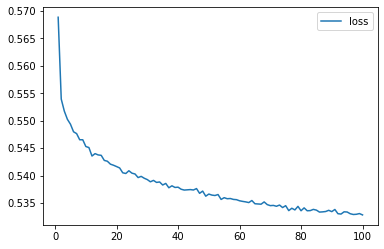

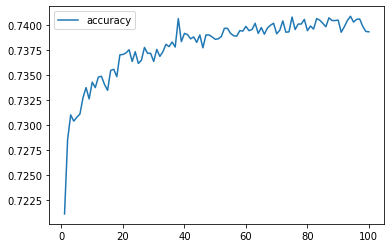

In [30]:
# Create a DataFrame containing training history of the 1st model
history_df = pd.DataFrame(fit_model_1.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y='loss')

# Plot the accuracy
history_df.plot(y='accuracy')

In [20]:
nn_model_1.save('../h5_files/AlphabetSoupCharity_model_1.h5')

In [21]:
# Define the 2nd model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]
# X shape/ input feature/columns is 43 * 2 is 86 so chose 80 for the first hidden node
hidden_node1 = 90
hidden_node2 = 30
# Add a third hidden layer
hidden_node3 = 20

nn_model_2 = tf.keras.models.Sequential()

# First hidden layer
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node1, activation='tanh', input_dim=input_features,))

# Second hidden layer
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node2, activation='tanh'))

# Third hidden layer
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node3, activation='tanh'))


# Output layer (output is 1 and sigmoid because it's binary classifier)
nn_model_2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 90)                3960      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                2730      
_________________________________________________________________
dense_6 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 7,331
Trainable params: 7,331
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the  2nd model
nn_model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Train the 2nd model
fit_model_2 = nn_model_2.fit(X_train_scaled, y_train, epochs=50,callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 3s 130us/sample - loss: 0.5682 - accuracy: 0.7217
Epoch 2/100
25724/25724 [==============================] - 2s 81us/sample - loss: 0.5562 - accuracy: 0.7294
Epoch 3/100
25724/25724 [==============================] - 3s 119us/sample - loss: 0.5526 - accuracy: 0.7282
Epoch 4/100
25724/25724 [==============================] - 3s 114us/sample - loss: 0.5507 - accuracy: 0.7306
Epoch 5/100
25184/25724 [============================>.] - ETA: 0s - loss: 0.5498 - accuracy: 0.7309
Epoch 00005: saving model to checkpoints/weights.5.hdf5
25724/25724 [==============================] - 2s 95us/sample - loss: 0.5492 - accuracy: 0.7314
Epoch 6/100
25724/25724 [==============================] - 3s 98us/sample - loss: 0.5484 - accuracy: 0.7323
Epoch 7/100
25724/25724 [==============================] - 3s 109us/sample - loss: 0.5469 - accuracy: 0.7327
Epoch 8/100
25724/25724 [==============================] - 4s 168us/samp

In [24]:
# Evaluate the 2nd model using the test data
model_loss, model_accuracy = nn_model_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

8575/1 - 1s - loss: 0.5230 - accuracy: 0.7289
Loss: 0.5631541462403344, Accuracy: 0.728863000869751


<AxesSubplot:>

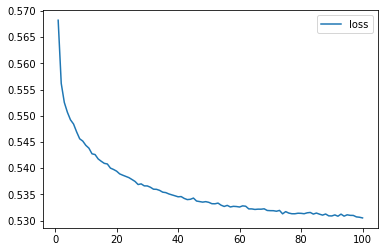

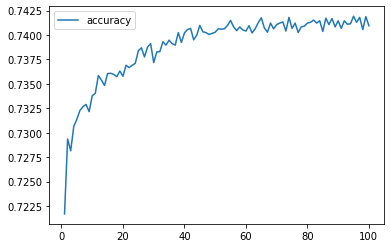

In [29]:
# Create a DataFrame containing training history of the 2nd model
history_df = pd.DataFrame(fit_model_2.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y='loss')

# Plot the accuracy
history_df.plot(y='accuracy')

In [25]:
# Save the 2nd model
nn_model_2.save('../h5_files/AlphabetSoupCharity_model_2.h5')